In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
patowns=gpd.read_file("Municipality_Boundaries_2017/geo_export_01d267d0-52ce-42f1-8380-b24f6cf57204.shp")

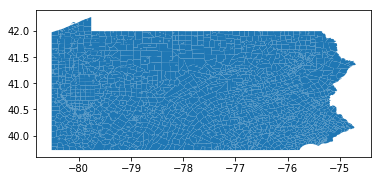

In [3]:
patowns.plot()

In [4]:
url=("http://www.buckscounty.org/government/Finance/BoardofAssessment/MillageRates")
tables=pd.read_html(url,header=0)
df1=tables[3]
df1=df1.drop(columns={"Unnamed: 0"}).drop([54])
df1.columns=df1.columns.str.replace(" |/",'_').str.strip().str.lower()
df2=pd.read_csv("bucks_home_values.csv")
df2.columns=df2.columns.str.replace(" |/",'_').str.strip().str.lower()
df3=pd.merge(df1,df2, on='township_boro')
df3['county_millage']=24.45
df3=df3[['township_boro', 'school_district', '2018_twp_boro_millage',
       '2018_2019__school_mills', 'county_millage', 'total_millage',
       'average_residential_home_value']]
df3.columns=df3.columns.str.replace(' ',"_")
df3.rename(columns={"2018_twp_boro_millage":"twp_boro_millage_18",'2018_2019__school_mills':'school_mills_18'},inplace=True)
df3['ave_muni_bill']=((df3.average_residential_home_value*df3.twp_boro_millage_18)/1000).round(2)
df3['ave_school_bill']=((df3.average_residential_home_value*df3.school_mills_18)/1000).round(2)
df3['ave_county_bill']=((df3.average_residential_home_value*df3.county_millage)/1000).round(2)
df3['ave_total_bill']=((df3.average_residential_home_value*df3.total_millage)/1000).round(2)


In [5]:
df3

,township_boro,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill
0,Bedminster Twp,Pennridge SD,7.50000,135.2555,24.45,167.20550,38383,287.87,5191.51,938.46,6417.85
1,Bensalem Twp,Bensalem SD,19.50000,159.1731,24.45,203.12310,23470,457.66,3735.79,573.84,4767.30
2,Bridgeton Twp,Palisades SD,6.00000,114.3000,24.45,144.75000,30553,183.32,3492.21,747.02,4422.55
3,Bristol Boro,Bristol Boro SD,57.89000,154.0000,24.45,236.34000,17777,1029.11,2737.66,434.65,4201.42
4,Bristol Twp,Bristol Twp SD,23.98000,220.1400,24.45,268.57000,18131,434.78,3991.36,443.30,4869.44
5,Buckingham Twp,Central Bucks SD,4.00000,124.1000,24.45,152.55000,16588,66.35,2058.57,405.58,2530.50
6,Chalfont Boro,Central Bucks SD,18.25000,124.1000,24.45,166.80000,29745,542.85,3691.35,727.27,4961.47
7,Doylestown Boro,Central Bucks SD,13.17500,124.1000,24.45,161.72500,29410,387.48,3649.78,719.07,4756.33
8,Doylestown Twp,Central Bucks SD,11.87500,124.1000,24.45,160.42500,40638,482.58,5043.18,993.60,6519.35
9,Dublin Boro,Pennridge SD,18.25000,135.2555,24.45,177.95550,26244,478.95,3549.65,641.67,4670.26


In [6]:
patowns.columns

Index(['ansi_code', 'class_of_m', 'county', 'county_nam', 'dced_id',
       'district_n', 'fed_aid_ur', 'fed_id_num', 'fips_code', 'fips_count',
       'fips_mun_c', 'fips_mun_p', 'fips_sq_mi', 'fips_state', 'gnis_ppl',
       'municipa_1', 'municipal', 'objectid', 'planning_p', 'shape_are',
       'shape_len', 'vx_count', 'geometry'],
      dtype='object')

In [7]:
patowns1=patowns[['class_of_m', 'county_nam', 'municipa_1', 'geometry']]

In [8]:
buckstowns=patowns1[patowns1.county_nam=='BUCKS']

In [9]:
buckstowns.class_of_m.value_counts()

2TWP    30
BORO    23
1TWP     1
Name: class_of_m, dtype: int64

In [10]:
buckstowns['class_of_m']=buckstowns.class_of_m.str.replace("2TWP|1TWP",'TWP')

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
buckstowns.drop(columns={'county_nam'},inplace=True)

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
buckstowns.head(3)

,class_of_m,municipa_1,geometry
104,TWP,UPPER MAKEFIELD,POLYGON ((-74.91426302000026 40.26298903436477...
108,TWP,NORTHAMPTON,POLYGON ((-75.06616793550769 40.21138829414874...
154,TWP,SPRINGFIELD,POLYGON ((-75.29363381862896 40.56191549143411...


In [14]:
df3.head(3)

,township_boro,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill
0,Bedminster Twp,Pennridge SD,7.5,135.2555,24.45,167.2055,38383,287.87,5191.51,938.46,6417.85
1,Bensalem Twp,Bensalem SD,19.5,159.1731,24.45,203.1231,23470,457.66,3735.79,573.84,4767.30
2,Bridgeton Twp,Palisades SD,6.0,114.3000,24.45,144.7500,30553,183.32,3492.21,747.02,4422.55


In [15]:
buckstowns['towns']=buckstowns.municipa_1+" "+buckstowns.class_of_m

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
bmap1=buckstowns[['towns','geometry']]

In [17]:
bmap1

,towns,geometry
104,UPPER MAKEFIELD TWP,POLYGON ((-74.91426302000026 40.26298903436477...
108,NORTHAMPTON TWP,POLYGON ((-75.06616793550769 40.21138829414874...
154,SPRINGFIELD TWP,POLYGON ((-75.29363381862896 40.56191549143411...
211,SELLERSVILLE BORO,"POLYGON ((-75.32231815707847 40.3630725648114,..."
223,BENSALEM TWP,"POLYGON ((-74.99165894397615 40.1344050248029,..."
232,RICHLANDTOWN BORO,POLYGON ((-75.31893622586787 40.47907161861421...
234,RIEGELSVILLE BORO,POLYGON ((-75.19129083063962 40.58570594796645...
236,NOCKAMIXON TWP,POLYGON ((-75.15062533652618 40.57085684335124...
337,FALLS TWP,(POLYGON ((-74.80029354941779 40.2087775333423...
340,HAYCOCK TWP,POLYGON ((-75.30025923014693 40.49346657710261...


In [18]:
df3.columns

Index(['township_boro', 'school_district', 'twp_boro_millage_18',
       'school_mills_18', 'county_millage', 'total_millage',
       'average_residential_home_value', 'ave_muni_bill', 'ave_school_bill',
       'ave_county_bill', 'ave_total_bill'],
      dtype='object')

In [19]:
df3.columns=df3.columns.str.lower().str.replace("/",'_').str.replace(" ",'_').str.replace("township_boro",'towns')

In [20]:
pd.merge(bmap1, df3,on='towns')

,towns,geometry,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill


In [21]:
bmap1['towns']=bmap1.towns.str.title()

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
bmap1

,towns,geometry
104,Upper Makefield Twp,POLYGON ((-74.91426302000026 40.26298903436477...
108,Northampton Twp,POLYGON ((-75.06616793550769 40.21138829414874...
154,Springfield Twp,POLYGON ((-75.29363381862896 40.56191549143411...
211,Sellersville Boro,"POLYGON ((-75.32231815707847 40.3630725648114,..."
223,Bensalem Twp,"POLYGON ((-74.99165894397615 40.1344050248029,..."
232,Richlandtown Boro,POLYGON ((-75.31893622586787 40.47907161861421...
234,Riegelsville Boro,POLYGON ((-75.19129083063962 40.58570594796645...
236,Nockamixon Twp,POLYGON ((-75.15062533652618 40.57085684335124...
337,Falls Twp,(POLYGON ((-74.80029354941779 40.2087775333423...
340,Haycock Twp,POLYGON ((-75.30025923014693 40.49346657710261...


In [26]:
t1=pd.merge(bmap1, df3,on='towns')

In [27]:
bmap1.shape

(54, 2)

In [28]:
t1.shape

(50, 12)

In [29]:
df3['towns']=df3.towns.str.replace("E R",'East R').str.replace('.','').str.replace("South", 'Southampton').str.strip()

In [30]:
t1=pd.merge(bmap1, df3,on='towns')
t1.shape

(54, 12)

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


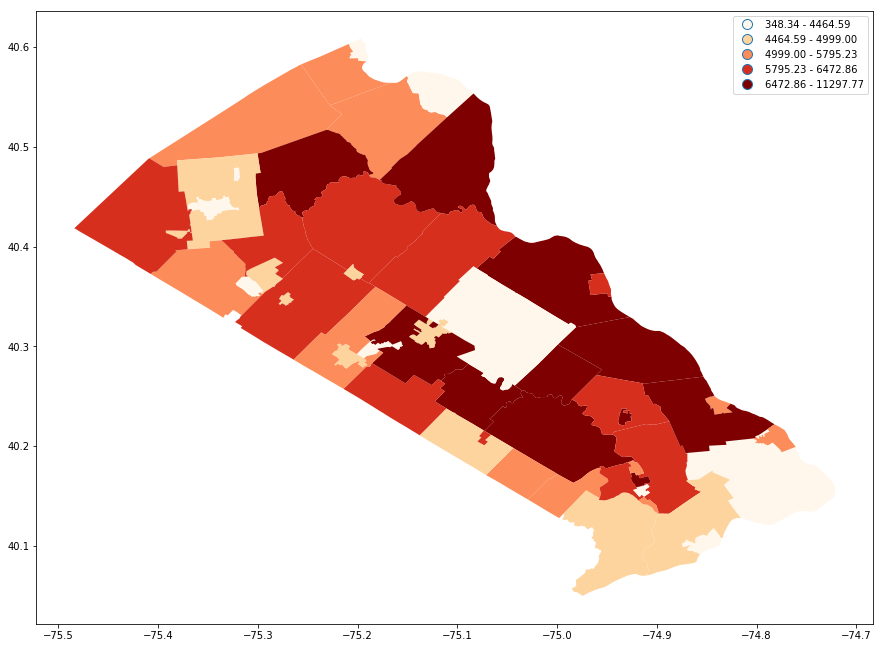

In [43]:
t1[t1.ave_total_bill.notnull()].plot(column='ave_total_bill', cmap='OrRd', scheme='quantiles',legend=True, figsize=(15,15))

In [49]:
t1.ave_total_bill.median()

5512.38

In [47]:
t1[t1.ave_total_bill.notnull()]

,towns,geometry,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill
0,Upper Makefield Twp,POLYGON ((-74.91426302000026 40.26298903436477...,Council Rock SD,7.60250,123.6070,24.45,155.65950,72580,551.79,8971.40,1774.58,11297.77
1,Northampton Twp,POLYGON ((-75.06616793550769 40.21138829414874...,Council Rock SD,14.91110,123.6070,24.45,162.96810,39812,593.64,4921.04,973.40,6488.09
2,Springfield Twp,POLYGON ((-75.29363381862896 40.56191549143411...,Palisades SD,12.00000,114.3000,24.45,150.75000,38431,461.17,4392.66,939.64,5793.47
3,Sellersville Boro,"POLYGON ((-75.32231815707847 40.3630725648114,...",Pennridge SD,24.00000,135.2555,24.45,183.70550,21997,527.93,2975.22,537.83,4040.97
4,Bensalem Twp,"POLYGON ((-74.99165894397615 40.1344050248029,...",Bensalem SD,19.50000,159.1731,24.45,203.12310,23470,457.66,3735.79,573.84,4767.30
5,Richlandtown Boro,POLYGON ((-75.31893622586787 40.47907161861421...,Quakertown SD,5.00000,164.3900,24.45,193.84000,21401,107.00,3518.11,523.25,4148.37
6,Riegelsville Boro,POLYGON ((-75.19129083063962 40.58570594796645...,Palisades SD,13.25000,114.3000,24.45,15.00000,23223,307.70,2654.39,567.80,348.34
7,Nockamixon Twp,POLYGON ((-75.15062533652618 40.57085684335124...,Palisades SD,6.00000,114.3000,24.45,144.75000,36353,218.12,4155.15,888.83,5262.10
8,Falls Twp,(POLYGON ((-74.80029354941779 40.2087775333423...,Pennsbury SD,7.22000,167.5400,24.45,199.21000,19796,142.93,3316.62,484.01,3943.56
9,Haycock Twp,POLYGON ((-75.30025923014693 40.49346657710261...,Quakertown SD,6.00000,164.3900,24.45,194.84000,35539,213.23,5842.26,868.93,6924.42


In [48]:
t1.to_file("taxmap1.rar")

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [41]:
df2=pd.read_csv("bucks_home_values.csv")

In [45]:
#df2.columns=df2.columns.str.replace(" |/",'_').str.strip().str.lower()
#df2.rename(columns={'township_boro','towns'},inplace=True)


TypeError: 'set' object is not callable

In [49]:
df2.rename(columns={'township_boro':'towns'},inplace=True)

In [50]:
df2['towns']=df2.towns.str.replace("E R",'East R').str.replace('.','').str.replace("South", 'Southampton').str.strip()

In [53]:
bmap2=pd.merge(t1,df2,on='towns')

In [55]:
bmap2['county_millage']=24.45

In [57]:
bmap2.columns

Index(['towns', 'geometry', 'school_district', '2018_twp_boro_millage',
       '2018_2019__school_mills', 'total_millage',
       'average_residential_home_value', 'county_millage'],
      dtype='object')

In [60]:
bmap2=bmap2[['towns', 'school_district', '2018_twp_boro_millage',
       '2018_2019__school_mills','county_millage', 'total_millage','average_residential_home_value','geometry']]

In [61]:
bmap2.rename(columns={"2018_twp_boro_millage":"twp_boro_millage_18",'2018_2019__school_mills':'school_mills_18'},inplace=True)

In [63]:
bmap2['ave_muni_bill']=((bmap2.average_residential_home_value*bmap2.twp_boro_millage_18)/1000).round(2)
bmap2['ave_school_bill']=((bmap2.average_residential_home_value*bmap2.school_mills_18)/1000).round(2)
bmap2['ave_county_bill']=((bmap2.average_residential_home_value*bmap2.county_millage)/1000).round(2)
bmap2['ave_total_bill']=((bmap2.average_residential_home_value*bmap2.total_millage)/1000).round(2)

In [65]:
bmap2.columns

Index(['towns', 'school_district', 'twp_boro_millage_18', 'school_mills_18',
       'county_millage', 'total_millage', 'average_residential_home_value',
       'geometry', 'ave_muni_bill', 'ave_school_bill', 'ave_county_bill',
       'ave_total_bill'],
      dtype='object')

In [67]:
bmap2=bmap2[['towns', 'school_district', 'twp_boro_millage_18', 'school_mills_18',
       'county_millage', 'total_millage', 'average_residential_home_value',
       'ave_muni_bill', 'ave_school_bill', 'ave_county_bill',
       'ave_total_bill','geometry']]

In [ ]:
bmap2.plot()